# 4 Musketeers Code Demo
## Introduction - <what do we do for this program?>



#### Setup

In [3]:
pip install --user --upgrade google-cloud-language

Note: you may need to restart the kernel to use updated packages.


In [4]:
%matplotlib inline
! pip install --user pandas
! pip install --user numpy
! pip install --user matplotlib

In [5]:
# Import google-cloud-language
# Make sure that you have installed or upgraded to the latest google-cloud-language using pip
from google.cloud import language_v1 as language
import pandas as pd
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Print all columns and all rows in a panda dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Set up functions to call Google Natural Language API
Sentiment Analysis:

In [97]:
# Module to give 'sentiment' results:
# take a sentence, run the module, result back:
# 1. original text; 
# 2. sentiment score -- between -1 to 1
# 3. sentiment magnitude -- absolute value of the score, but will agrregate
def analyze_text_sentiment(text):
    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)

    response = client.analyze_sentiment(document=document)

    sentiment = response.document_sentiment
    results = dict(
        text=text,
        score=f"{sentiment.score:.1%}",
        magnitude=f"{sentiment.magnitude:.1%}",
    )
    
    # Get sentiment for all sentences in the document
    sentence_sentiment = []
    for sentence in response.sentences:
        item={}
        item["text"]=sentence.text.content
        item["sentiment score"]=sentence.sentiment.score
        item["sentiment magnitude"]=sentence.sentiment.magnitude
        sentence_sentiment.append(item)
    
    return sentence_sentiment

In [98]:
# return results by sentence
def save_sentiment_to_df (text):
    df_sentiment=pd.DataFrame(analyze_text_sentiment(text))
    return df_sentiment

In [100]:
# get text from a file
def get_text_from_file (file_name):
    #open text file in read mode
    text_file = open(file_name, "r")
    
    #read whole file to a string
    data = text_file.read()

    #close file
    text_file.close()

    return data

In [132]:
#Get basic information
def get_basic_info(file_name):
    text = get_text_from_file (file_name)
    # create the result into dataframe for further info
    df_text_sentiment_stats = save_sentiment_to_df(text)
    df_text_sentiment_stats.reset_index(inplace=True)
    # 1. how many sentense?
    cnt_sentences = df_text_sentiment_stats.shape[0]
    print("There are total of ", cnt_sentences, " sentences in the artical.")
    # 2. The sentiment score of each sentence:
    #print(df_text_sentiment_stats['sentiment score'])
    return df_text_sentiment_stats['sentiment score']

In [133]:
# visualization (code test) 
def text_sentiment_line_chart(df_sentiment_score):
    df_sentiment_score.plot(kind='line', y='sentiment score', x=df_sentiment_score.index+1)

    # Build the chart graphic
    ax = plt.axes()
    ax.grid()
    ax.margins(0) # remove default margins (matplotlib verision 2+)
    ax.axhspan(0, 2.0, facecolor='bisque', alpha=0.5)
    ax.axhspan(-2.0, 0, facecolor='lightcoral', alpha=0.5)

    # Giving y label using xlabel() method 
    plt.ylabel("Sentiment Score", fontweight='bold')  
    # Giving title to the plot
    plt.title("Sentiment Score by Sentence", fontweight='bold')
    plt.show()


In [136]:
def process_one_file(file_name):
    df_sentiment_score = get_basic_info(file_name)
    text_sentiment_line_chart(df_sentiment_score)

# Demo 1 - Process a single news article
### 1. Basic information
### 2. Visualization - bar chart for each sentence
<dl>
  <dt>Input</dt>
      <dd>- file name</dd>
  <dt>Output</dt>
      <dd>- basic info and Sentiment Score Chart</dd>
</dl>

There are total of  78  sentences in the artical.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


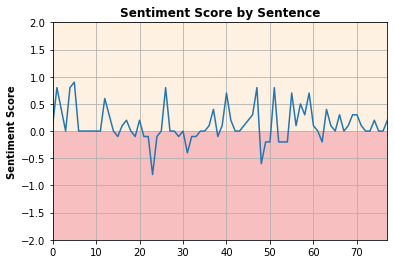

In [137]:
process_one_file("news1.txt")

## Demo 2 - Process multiple news article
### 1. Basic information
### 2. Visualization - bar chart for each sentence
<dl>
  <dt>Input</dt>
      <dd>- LIST of file names</dd>
  <dt>Output</dt>
      <dd>- basic info and Sentiment Score Chart</dd>
</dl>

In [140]:
file_name_list = ['news1.txt', 'news2.txt', 'news3.txt']

There are total of  78  sentences in the artical.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


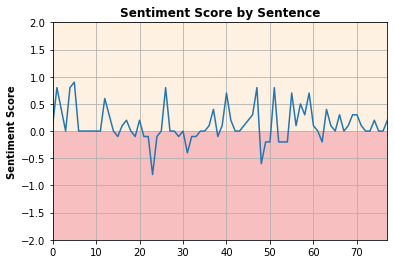

There are total of  18  sentences in the artical.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


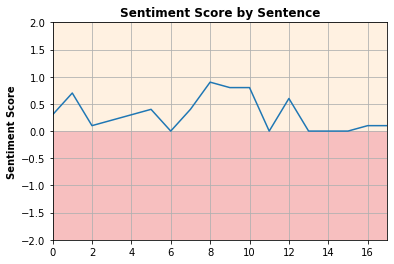

There are total of  13  sentences in the artical.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


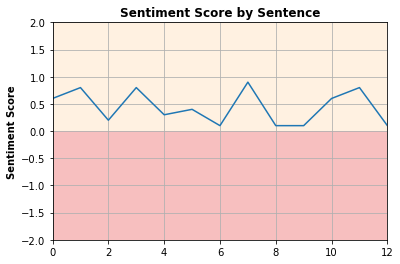

In [146]:
#print(file_name_list[0])
for x in file_name_list:
  process_one_file(x)